<a href="https://colab.research.google.com/github/amitu2016/Machine-Learning-A-Z/blob/master/ANN/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

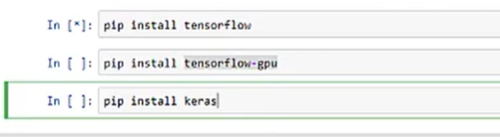


### Importing the libraries

In [28]:
#!pip install tensorflow

In [29]:
#!pip install tensorflow-gpu

In [30]:
#!pip install keras

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [31]:
dataset = pd.read_csv('D:/Test/Churn_Modelling.csv')
#dataset

In [8]:

X = dataset.iloc[ : , 3:-1 ].values
y = dataset.iloc[: , -1].values

In [32]:
#print(X)

In [33]:
#print(y)

### Encoding categorical data

Label Encoding the "Gender" column

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[ :, 2] = le.fit_transform(X[ :, 2])

In [34]:
#print(X)

One Hot Encoding the "Geography" column

In [35]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
#print(X)

### Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1 )

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
#print(X_train)

In [41]:
#print(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [42]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [43]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [44]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [45]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [46]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

### Training the ANN on the Training set

In [47]:
ann.fit(X_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.7091
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8083
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8183
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8230
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8217
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8261
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8331
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8414
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8486
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3676 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8624
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8627
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8629
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8627
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8612
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8608
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8619
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8616
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8614
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [25]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))> 0.5)

1/1 [==============================] - 0s 138ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1529   56]
 [ 210  205]]


0.867